# Loan Prediction

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv("Loan Prediction Dataset.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Imputing null values

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan['LoanAmount']=loan['LoanAmount'].fillna(loan.LoanAmount.mean())
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].fillna(loan.Loan_Amount_Term.mean())
loan['Credit_History']=loan['Credit_History'].fillna(loan.Credit_History.mean())

loan['Gender']=loan['Gender'].fillna(loan.Gender.mode()[0])
loan['Self_Employed']=loan['Self_Employed'].fillna(loan.Self_Employed.mode()[0])
loan['Dependents']=loan['Dependents'].fillna(loan.Dependents.mode()[0])
loan['Married']=loan['Married'].fillna(loan.Married.mode()[0])

In [7]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Checking for Outliers

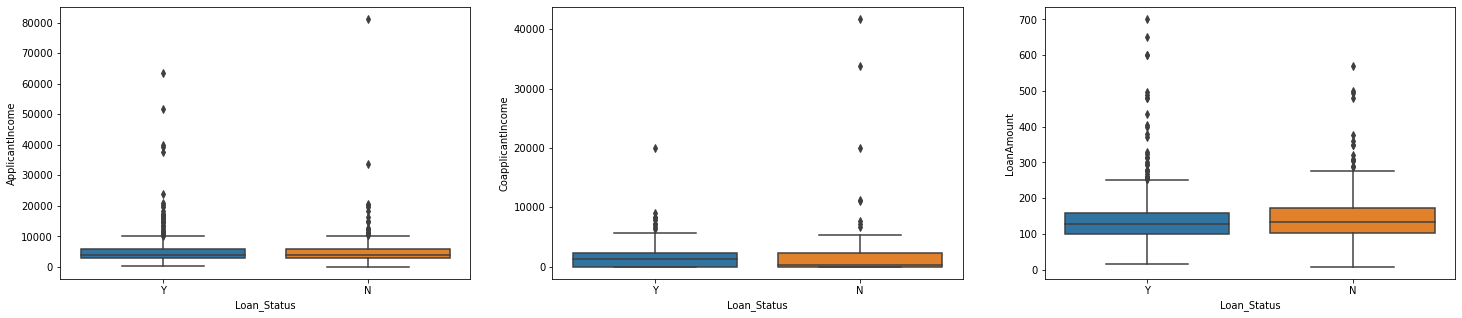

In [8]:
box=['ApplicantIncome','CoapplicantIncome','LoanAmount']
fig,ax=plt.subplots(1,3,figsize=(25,5))
for i,col in enumerate(box):
    sns.boxplot(data=loan,y=col,x='Loan_Status',ax=ax[i])
plt.subplots_adjust(hspace=2)

In [9]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Pair plot realtion and distribution plot of ApplicantIncome ,CoapplicantIncome, LoanAmount

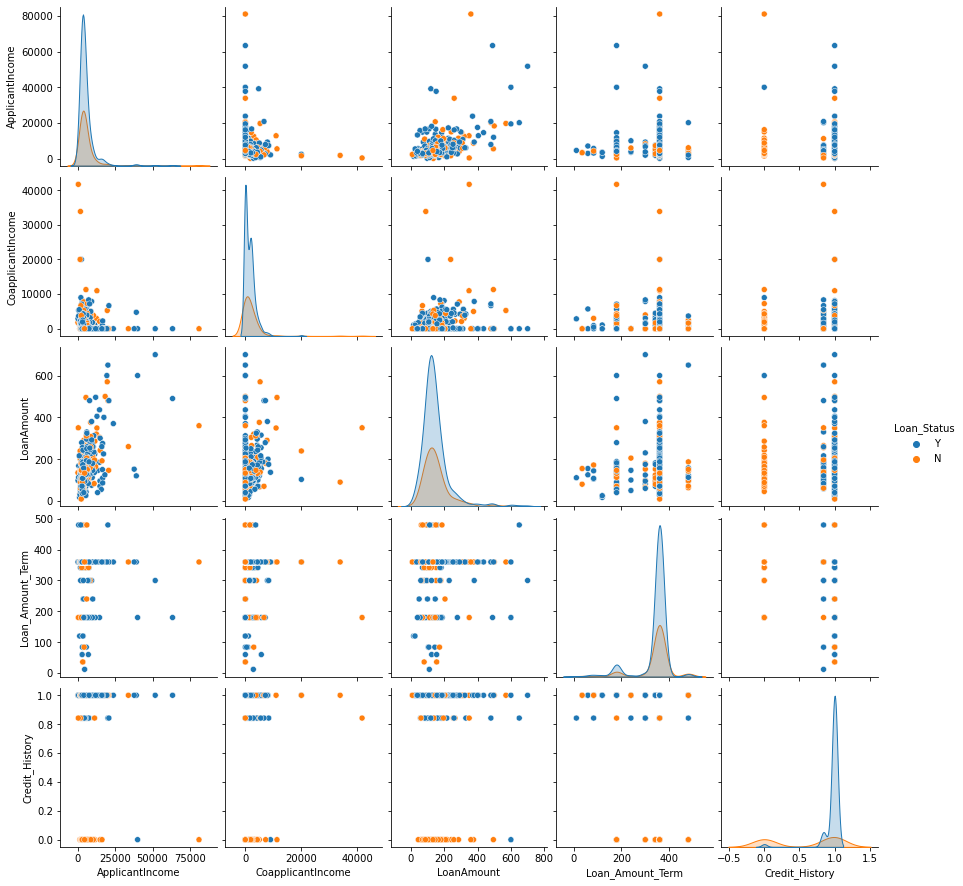

In [10]:
sns.pairplot(data=loan,hue='Loan_Status')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

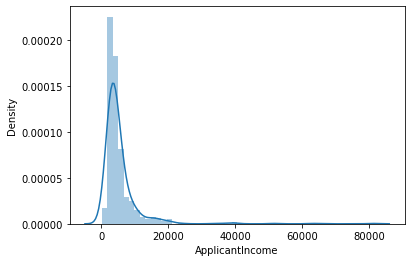

In [11]:
sns.distplot(loan['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

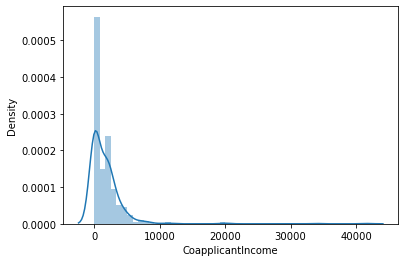

In [12]:
sns.distplot(loan['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

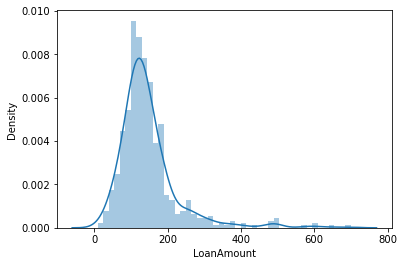

In [13]:
sns.distplot(loan['LoanAmount'])

In [14]:
loan['Loan_Amount_Term']=loan['Loan_Amount_Term']/12

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

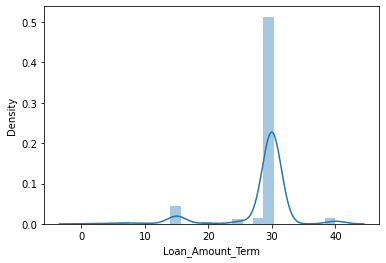

In [15]:
sns.distplot(loan['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

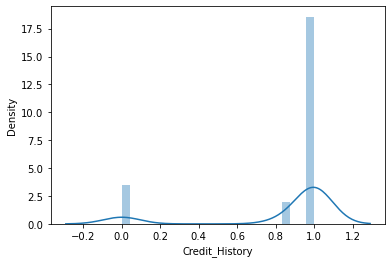

In [16]:
sns.distplot(loan['Credit_History'])

In [17]:
loan['Total_Income']=loan['ApplicantIncome']+loan['CoapplicantIncome']
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,30.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,30.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,30.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,30.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,30.0,1.0,Urban,Y,6000.0


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

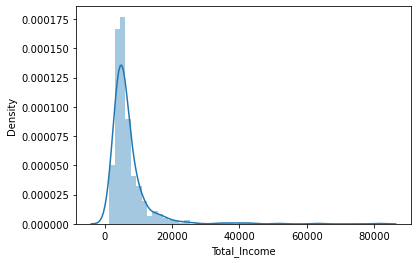

In [18]:
sns.distplot(loan['Total_Income'])

### Outliers Treatment and distribution plot after treatment 

In [19]:
ai=np.percentile(loan.ApplicantIncome,[70])[0]
loan.ApplicantIncome[(loan.ApplicantIncome>(3*ai))]=3*ai

cai=np.percentile(loan.CoapplicantIncome,[75])[0]
loan.CoapplicantIncome[(loan.CoapplicantIncome>(2.5*cai))]=2.5*cai

la=np.percentile(loan.LoanAmount,[80])[0]
loan.LoanAmount[(loan.LoanAmount>la)]=la

tic=np.percentile(loan.Total_Income,[75])[0]
loan.Total_Income[(loan.Total_Income >1.5*tic)]=1.5*tic

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

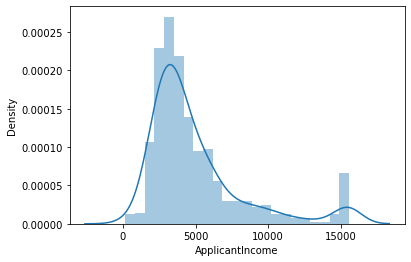

In [20]:
sns.distplot(loan['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

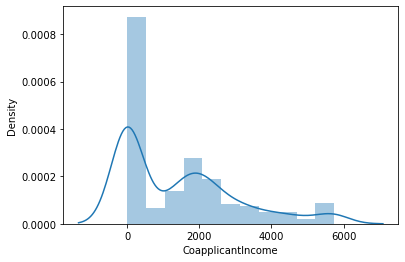

In [21]:
sns.distplot(loan['CoapplicantIncome'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

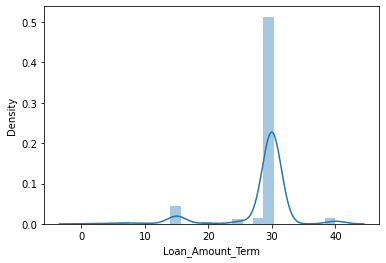

In [22]:
sns.distplot(loan['Loan_Amount_Term'])

### Natural Log Transformation

#### Transforming into natural logs to high values

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

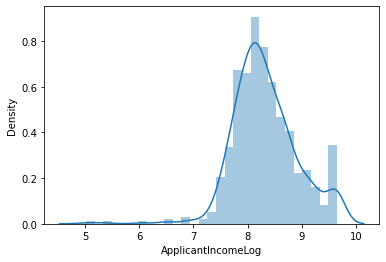

In [23]:
loan['ApplicantIncomeLog']=np.log(loan['ApplicantIncome']+1)
sns.distplot(loan['ApplicantIncomeLog'])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

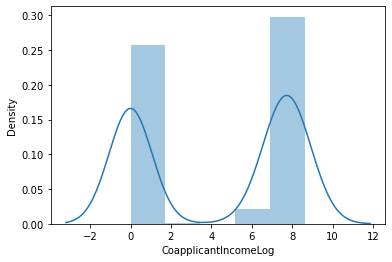

In [24]:
loan['CoapplicantIncomeLog']=np.log(loan['CoapplicantIncome']+1)
sns.distplot(loan['CoapplicantIncomeLog'])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

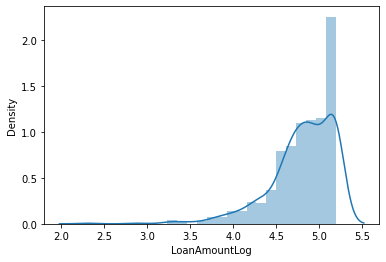

In [25]:
loan['LoanAmountLog']=np.log(loan['LoanAmount']+1)
sns.distplot(loan['LoanAmountLog'])

<AxesSubplot:xlabel='Loan_Amount_term_Log', ylabel='Density'>

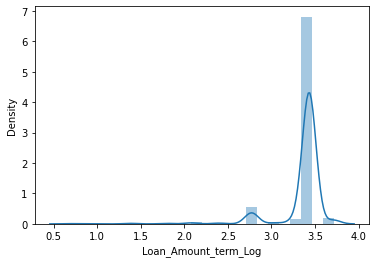

In [26]:
loan['Loan_Amount_term_Log']=np.log(loan['Loan_Amount_Term']+1)
sns.distplot(loan['Loan_Amount_term_Log'])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

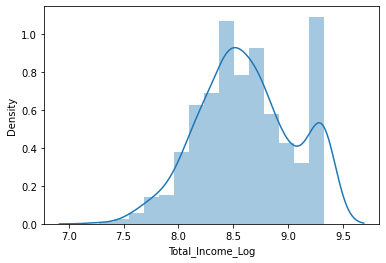

In [27]:
loan['Total_Income_Log']=np.log(loan['Total_Income']+1)
sns.distplot(loan['Total_Income_Log'])

### Plotting the Correlation of the dataset

<AxesSubplot:>

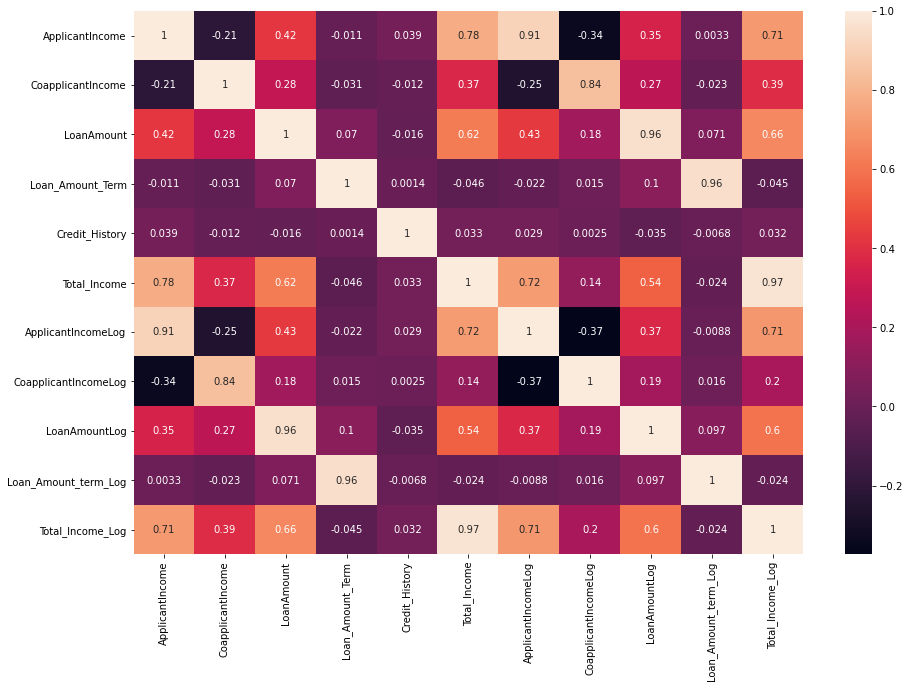

In [28]:
corr=loan.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [29]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ApplicantIncomeLog', 'CoapplicantIncomeLog',
       'LoanAmountLog', 'Loan_Amount_term_Log', 'Total_Income_Log'],
      dtype='object')

In [30]:
col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_ID','Total_Income','Married','Gender']
loan=loan.drop(columns=col,axis=1)

In [31]:
loan.head()

,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_term_Log,Total_Income_Log
0,0,Graduate,No,1.0,Urban,Y,8.674197,0.000000,4.993232,3.433987,8.674197
1,1,Graduate,No,1.0,Rural,N,8.430327,7.319202,4.859812,3.433987,8.714732
2,0,Graduate,Yes,1.0,Urban,Y,8.006701,0.000000,4.204693,3.433987,8.006701
3,0,Not Graduate,No,1.0,Urban,Y,7.857094,7.765993,4.795791,3.433987,8.505525
4,0,Graduate,No,1.0,Urban,Y,8.699681,0.000000,4.955827,3.433987,8.699681


### Using Label Encoding and One hot encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
loan['Dependents']=encode.fit_transform(loan['Dependents'])

In [33]:
loan.columns

Index(['Dependents', 'Education', 'Self_Employed', 'Credit_History',
       'Property_Area', 'Loan_Status', 'ApplicantIncomeLog',
       'CoapplicantIncomeLog', 'LoanAmountLog', 'Loan_Amount_term_Log',
       'Total_Income_Log'],
      dtype='object')

### Making dummy variables 

In [34]:
edu = pd.get_dummies(loan['Education'], prefix='Education')
emp = pd.get_dummies(loan['Self_Employed'],prefix='Self_Employed')
area = pd.get_dummies(loan['Property_Area'], prefix='Property_Area')
status = pd.get_dummies(loan['Loan_Status'], prefix='Loan_Status')

loan = pd.concat([loan,edu,emp,area,status],join='outer', axis=1)

In [35]:
loan.drop(['Education','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)

In [36]:
loan.columns

Index(['Dependents', 'Credit_History', 'ApplicantIncomeLog',
       'CoapplicantIncomeLog', 'LoanAmountLog', 'Loan_Amount_term_Log',
       'Total_Income_Log', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_N',
       'Loan_Status_Y'],
      dtype='object')

In [37]:
loan.head()

,Dependents,Credit_History,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_term_Log,Total_Income_Log,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,1.0,8.674197,0.000000,4.993232,3.433987,8.674197,1,0,1,0,0,0,1,0,1
1,1,1.0,8.430327,7.319202,4.859812,3.433987,8.714732,1,0,1,0,1,0,0,1,0
2,0,1.0,8.006701,0.000000,4.204693,3.433987,8.006701,1,0,0,1,0,0,1,0,1
3,0,1.0,7.857094,7.765993,4.795791,3.433987,8.505525,0,1,1,0,0,0,1,0,1
4,0,1.0,8.699681,0.000000,4.955827,3.433987,8.699681,1,0,1,0,0,0,1,0,1


In [38]:
loan.drop(['Education_Not Graduate','Self_Employed_No','Loan_Status_N'],axis=1,inplace=True)

In [39]:
loan.head()

,Dependents,Credit_History,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_term_Log,Total_Income_Log,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,1.0,8.674197,0.000000,4.993232,3.433987,8.674197,1,0,0,0,1,1
1,1,1.0,8.430327,7.319202,4.859812,3.433987,8.714732,1,0,1,0,0,0
2,0,1.0,8.006701,0.000000,4.204693,3.433987,8.006701,1,1,0,0,1,1
3,0,1.0,7.857094,7.765993,4.795791,3.433987,8.505525,0,0,0,0,1,1
4,0,1.0,8.699681,0.000000,4.955827,3.433987,8.699681,1,0,0,0,1,1


In [40]:
x=loan.drop(columns=['Loan_Status_Y'],axis=1)
y=loan['Loan_Status_Y']

### Splitting train and test variables

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

### Making Clasification Report ,
### Checking accuracy Score,
### Cross Validation Score

In [42]:
from sklearn.metrics import classification_report
def pred(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print(classification_report(y_test,pre))
    print("Accuracy is ",model.score(x_test,y_test)*100)
    score=cross_val_score(model,x,y,cv=5)
    print("Cross Validation is",np.mean(score)*100)

### Using Logiestic Regression that gives the best result 

In [43]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
pred(model1, x, y)

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

Accuracy is  82.92682926829268
Cross Validation is 80.61975209916034


In [44]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
pred(model3,x,y)

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

Accuracy is  82.92682926829268
Cross Validation is 79.80807676929228


In [45]:
from sklearn.metrics import confusion_matrix
y_pred=model3.predict(x_test)

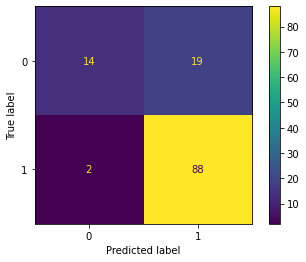

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model3, x_test, y_test)

In [47]:
from sklearn.naive_bayes import GaussianNB
model5=GaussianNB()
pred(model5,x,y)

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123

Accuracy is  82.11382113821138
Cross Validation is 80.45848327335733


In [48]:
loan.head()

,Dependents,Credit_History,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_term_Log,Total_Income_Log,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,1.0,8.674197,0.000000,4.993232,3.433987,8.674197,1,0,0,0,1,1
1,1,1.0,8.430327,7.319202,4.859812,3.433987,8.714732,1,0,1,0,0,0
2,0,1.0,8.006701,0.000000,4.204693,3.433987,8.006701,1,1,0,0,1,1
3,0,1.0,7.857094,7.765993,4.795791,3.433987,8.505525,0,0,0,0,1,1
4,0,1.0,8.699681,0.000000,4.955827,3.433987,8.699681,1,0,0,0,1,1


### Function for prediction 

In [49]:
def loan_prediction(model):
    dep=int(input("No. of Dependencies: "))
    ch=float(input("Enter your credit History: "))
    inc=float(input("Enter the Income of Applicant: "))
    coinc=float(input("Enter the Income of Co-applicant: "))
    amount=float(input("Enter the amount of Loan: "))
    term=float(input("Enter the duration of loan: "))
    total=inc+coinc
    eg=np.uint(input("Enter 1 if Graduate else 0: "))
    se=np.uint(input("Enter 1 if you are self-employed else 0: "))
    ru_y=np.uint(input("Enter 1 if you live in rural area else 0: "))
    su_y=np.uint(input("Enter 1 if you live in semi-urban area else 0: "))
    u_y=np.uint(input("Enter 1 if you live in urban area else 0: "))
    
    values=[[dep,ch,inc,coinc,amount,term,total,eg,se,ru_y,su_y,u_y]]
    mod=model.predict(values)
    if mod[0]==1:
        return "Loan can be sanctioned"
    else:
        return "Loan cannot be sanctioned"

In [51]:
final_model=LogisticRegression()
final_model.fit(x,y)

gh=loan_prediction(final_model)
print(gh)

No. of Dependencies: 5
Enter your credit History: 0
Enter the Income of Applicant: 10000
Enter the Income of Co-applicant: 5000
Enter the amount of Loan: 100000
Enter the duration of loan: 10
Enter 1 if Graduate else 0: 1
Enter 1 if you are self-employed else 0: 1
Enter 1 if you live in rural area else 0: 0
Enter 1 if you live in semi-urban area else 0: 0
Enter 1 if you live in urban area else 0: 1
Loan cannot be sanctioned
